In [2]:
# stdlib
import sys
import warnings
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# third party
from sklearn.datasets import load_diabetes

# synthcity absolute
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader


In [3]:
# Preprocessing data with OneHotEncoder or StandardScaler is not needed or recommended. Synthcity handles feature encoding and standardization internally.
#loader = GenericDataLoader(X)
# synthcity absolute
from synthcity.plugins import Plugins

Plugins().list()

[2025-04-29T16:05:28.799090+0800][31364][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


['aim',
 'image_cgan',
 'dpgan',
 'arf',
 'bayesian_network',
 'timegan',
 'privbayes',
 'survival_nflow',
 'pategan',
 'adsgan',
 'decaf',
 'tvae',
 'ddpm',
 'fflows',
 'survae',
 'great',
 'ctgan',
 'image_adsgan',
 'dummy_sampler',
 'survival_ctgan',
 'survival_gan',
 'nflow',
 'radialgan',
 'rtvae',
 'uniform_sampler',
 'timevae',
 'marginal_distributions']

In [ ]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get("tvae", n_iter = 200)
#real_path = "../CTAB-GAN-main/Real_Datasets/CreditLong2.csv"
#real_path = r"C:\Users\26332\Desktop\Churn_Modelling_processed.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/Adult3.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/creditcard2.csv"
#real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
# real_path = 'G:\DataSets\Covertype50k.csv'
#real_path = "../synthcity-main/tutorials/covertype_preprocessed.csv"
# real_path = 'G:/DataSets/adult_processed_0.csv'
#real_path = 'G:\DataSets\Covertype30k.csv'
# real_path = "G:/DataSets/newadu-20k.csv"
# real_path = "G:/DataSets/Adult.csv"
real_path = "G:/DataSets/Churn.csv"
data = pd.read_csv(real_path)
loader = GenericDataLoader(data)
syn_model.fit(loader)

[2025-04-29T16:05:30.346132+0800][31364][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 200/200 [04:19<00:00,  1.30s/it]


In [5]:
a = syn_model.generate(count=10000).dataframe()
a.to_csv('G:/DataSets/Fake_Dataset/Synthcity-tvae-churn200e.csv', index=False)

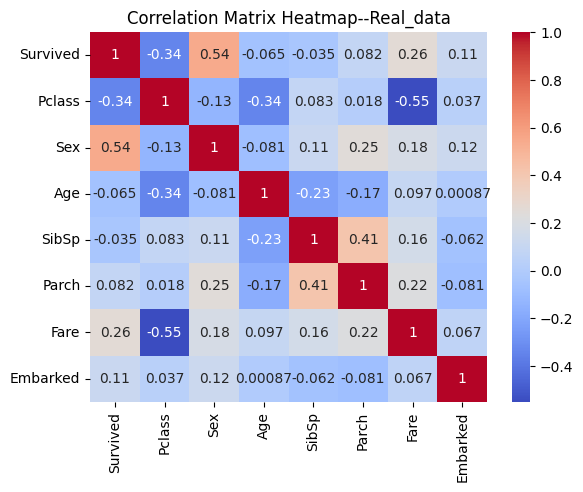

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix_real = data.corr()
sns.heatmap(correlation_matrix_real, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap--Real_data')
plt.show()

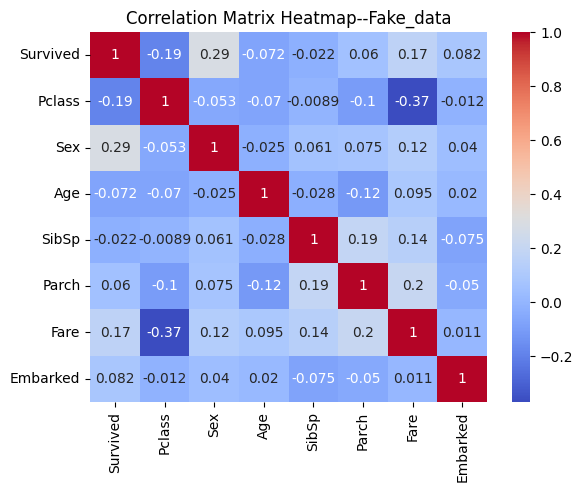

In [ ]:
correlation_matrix_fake = a.corr()
sns.heatmap(correlation_matrix_fake, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap--Fake_data')
plt.show()